# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)
X, Y 

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 7.,  7.,  8.,  9.,  9., 10., 10., 11., 11., 12.]))

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


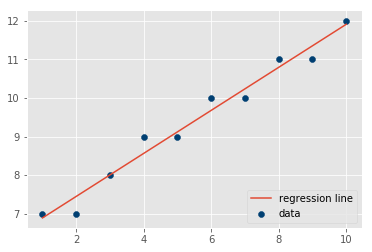

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

In [4]:
# Slope: 0.56
def calc_slope(xs,ys):
    slope = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    return slope

calc_slope(X,Y)

0.5575757575757568

In [5]:
# Y-Intercept: 6.33
def calc_intercept(xs,ys):
    slope = calc_slope(xs,ys)
    intercept = np.mean(ys) - slope*np.mean(xs)
    return slope, intercept

calc_intercept(X,Y)

(0.5575757575757568, 6.3333333333333375)

In [6]:
# Regression line
def reg_line (m, c, xs):
    line = []
    for x in xs:
        line.append((m*x)+c)
    return line

m, c = calc_intercept(X,Y)
y = reg_line(m, c, X)
y

[6.890909090909094,
 7.448484848484851,
 8.006060606060608,
 8.563636363636364,
 9.121212121212121,
 9.67878787878788,
 10.236363636363635,
 10.793939393939393,
 11.351515151515148,
 11.909090909090907]

In [7]:
# R-Squared: 0.97
#----------------------
# Calculate sum of squared errors between regression and mean line 
def sq_err(y_real, y_predicted):
    squarred_error = np.sum((y_real - y_predicted)**2)
    return squarred_error

# Calculate Y_mean , squared error for regression and mean line , and calculate r-square
def r_squared(y_real, y_predicted):
    SSR = sq_err(y_real, y_predicted)
    SST = np.sum((y_real - y_real.mean())**2)
    r_squared = 1 - SSR/SST
    return round(r_squared, 2)

In [8]:
m, c = calc_intercept(X, Y)
Y_pred = reg_line(m, c, X)
r_squared = r_squared(Y, Y_pred)
r_squared

0.97

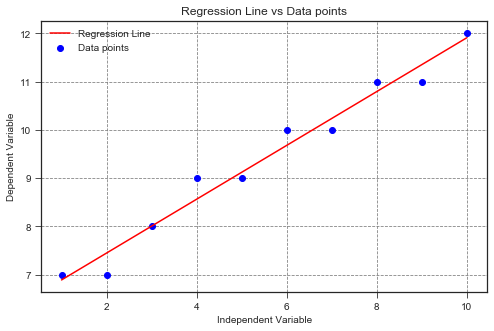

In [9]:
# Plot data and regression line
plt.style.use('seaborn-ticks')
plt.figure(figsize=(8,5))
plt.grid(color = 'grey', linestyle = '--')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Regression Line vs Data points')
plt.scatter(X, Y, color='blue', label="Data points")
plt.plot(X, Y_pred, color = 'red', label= "Regression Line")
plt.legend()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

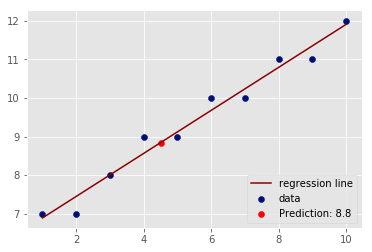

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

In [10]:
x_new = 4.5
y_new = (m*x_new)+c
y_new

8.842424242424244

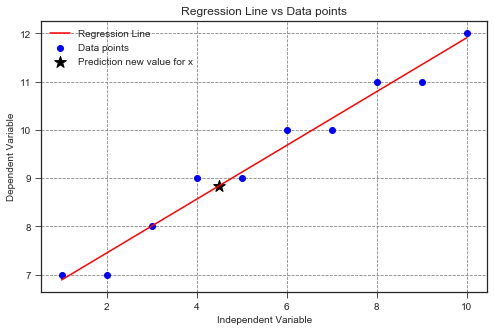

In [11]:
# Plot as above and show the predicted value
plt.style.use('seaborn-ticks')
plt.figure(figsize=(8,5))
plt.grid(color = 'grey', linestyle = '--')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Regression Line vs Data points')
plt.scatter(X,Y,color='blue', label="Data points")
plt.plot(X, Y_pred, color = 'red', label= "Regression Line")
plt.scatter(x_new,y_new, marker='*', s = 150, color='black', label='Prediction new value for x ')
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [12]:
import os # for work with path/dir
import pandas as pd
from glob import glob

In [13]:
# use glob to get all of the csv files
csv_files = os.path.basename(glob("./*.csv")[0])
csv_files

'heightWeight.csv'

In [14]:
df = pd.read_csv(csv_files)
df.head(2)

,height,weight
0,68,165
1,71,201


In [15]:
# iterating the columns 
for col in df.columns: 
    print(col)

height
weight


In [19]:
X = np.array(df['height'])
Y = np.array(df['weight'])
X, Y
print(type(Y))

<class 'numpy.ndarray'>


In [27]:
m, c = calc_intercept(X, Y)
Y_pred = reg_line(m, c, X)
#print(type(Y))
#print(type(Y_pred))
#r = r_squared(Y, Y_pred)
print(m, c)
print(Y_pred)
#print(r_squared)

5.539019232705614 -204.48343570637024
[172.16987211761148, 188.78692981572834, 133.39673748867216, 177.70889135031712, 188.78692981572834, 116.77967979055535, 194.32594904843393, 199.86496828113957, 116.77967979055535, 205.40398751384515, 133.39673748867216, 122.31869902326093, 177.70889135031712, 172.16987211761148, 150.01379518678903, 177.70889135031712, 194.32594904843393, 161.09183365220025, 155.55281441949467, 177.70889135031712]


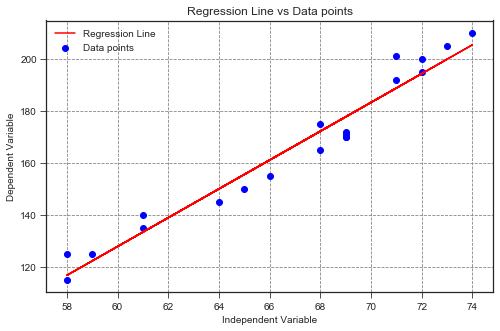

In [77]:
# Plot data and regression line
plt.style.use('seaborn-ticks')
plt.figure(figsize=(8,5))
plt.grid(color = 'grey', linestyle = '--')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Regression Line vs Data points')
plt.scatter(X, Y, color='blue', label="Data points")
plt.plot(X, Y_pred, color = 'red', label= "Regression Line")
plt.legend()